In [1]:
#Modelo SIR:

import numpy as np
from scipy.integrate import odeint, ode
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

N= 100 #Pobblación total.
I0 = 1 #Número inicial de personas infectadas.
R0 = 0 #Número inicial de individuos recuperado.
S0 = N - I0 - R0  #Número inicial de personas susceptibles.
β = 0.2 #La tasa de contacto esta definida por la constante.
γ = 1./10 #La tasa de recuperación esta definida por la constante.



In [2]:
inicio = 1
total_dias = 160
Num = 160

#Definimos ahora el array:

t = np.linspace(inicio, total_dias, Num)#Dominio del tiempo.
print(t)


[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160.]


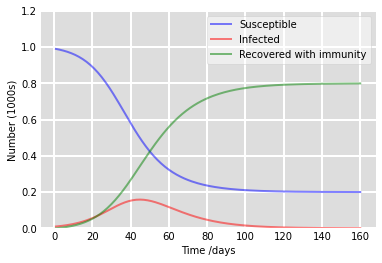

In [4]:
def dy(y, t, B, gamm):
  S, I, R = y[0], y[1], y[2]

  dS = (-1)*(B * S * I)/N
  dI = (B * S * I)/N + (-1)*(gamm * I)
  dR = gamm * I

  return [dS, dI, dR]

y0 = [S0,I0,R0]; #condiciones iniciales
t = np.linspace(inicio, total_dias, Num)#Dominio del tiempo.
β = 0.2 #La tasa de contacto esta definida por la constante.
γ = 1./10 #La tasa de recuperación esta definida por la constante.

y = odeint(dy, y0, t, args=(β,γ))
S,I,R = y.T
#print(y.T)

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible') #Variable S vs t
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected') # Variable I vs t
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity') #Variable R vs t

ax.set_xlabel('Time /days') #titulo del eje X
ax.set_ylabel('Number (1000s)') #titulo eje y
ax.set_ylim(0,1.2) #min z max del eje Y
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')

legend = ax.legend()
legend.get_frame().set_alpha(0.5)

for spine in ('top', 'right', 'bottom', 'left'): 
    ax.spines[spine].set_visible(False)
    
plt.show()

In [5]:
#  Modelo SEIR:

# Nuevas constantes:

N0 = 1000 #Pobblación total.
I0 = 1 #Número inicial de personas infectadas.
R0 = 0 #Número inicial de individuos recuperado.
E0 = 0 #Número inicial de personas expuestas.
S0 = N0 - E0 - I0 - R0  #Número inicial de personas susceptibles.
β = 0.6 #La tasa de contacto esta definida por la constante. Tasa de infección.
γ = 2./10 #La tasa de recuperación esta definida por la constante. Tasa de recuperación.
μ = 0.1 #Tasa de mortalidad
ν = 0.5 #Tasa de natalidad
α = 0.3 #Tasa de incuvación.

inicio = 0
total_dias = 100
Num = 200

t = np.linspace(inicio, total_dias, Num)#Dominio del tiempo.
#print(t)


In [7]:
#Definimos la funcion:
# Ecuaciones diferenciales del Modelo SIER.
def dz(z, t, b, gam, mu, nu, alf):
  S, E, I, R = z[0], z[1], z[2], z[3]
  N = S+E+I+R

  dS = (-1)*(b * S * I)/N + (-1)*(mu * S) + (nu * N)
  dE = (b * S * I)/N + (-1)*(alf * E) + (-1)*(mu * E)
  dI = (alf * E) + (-1)*(gam * I) + (-1)*(mu * I)
  dR = (gam * I) + (-1)*(mu * R)

  return [dS, dE, dI, dR]

z0 = [S0,E0,I0,R0]; #condiciones iniciales
t = np.linspace(inicio, total_dias, Num)#Dominio del tiempo.
β = 0.1 #La tasa de contacto esta definida por la constante. Tasa de infección.
γ = 1./10 #La tasa de recuperación esta definida por la constante. Tasa de recuperación.
μ = 0.1 #Tasa de mortalidad
ν = 0.1 #Tasa de natalidad
α = 0.1 #Tasa de incuvación.

z = odeint(dz, z0, t, args=(β,γ,μ,ν,α))
S,E,I,R = z.T
N = S+R+E+I
  

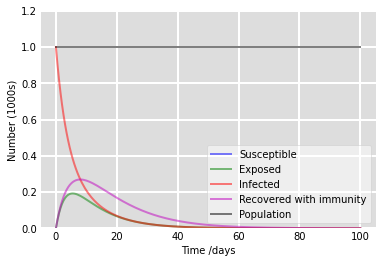

In [8]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
P = 1
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E, 'g', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'm', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t, (S+R+I+E)/N, 'k', alpha=0.5, lw=2, label='Population')

ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)

ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')

legend = ax.legend()
legend.get_frame().set_alpha(0.5)

for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
    
plt.show()